In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans

In [64]:
	
df = pd.read_csv('Obesity Classification.csv')

In [65]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [67]:
df.nunique()

ID        108
Age        75
Gender      2
Height     10
Weight     23
BMI        25
Label       4
dtype: int64

In [68]:
fig=px.histogram(data_frame=df,x='Age',color='Gender',facet_col='Gender',marginal='box',title='Age distribution',color_discrete_sequence=['#2BCDC1','#F66095'])
fig.show()

In [69]:
fig=px.sunburst(df,path=['Gender','Label'],values=df.value_counts().values,color_discrete_sequence=['#2BCDC1','#F66095'])
fig.show()

In [70]:
df2=df.drop('ID',axis=1)
df2=pd.get_dummies(df2)
df2.head()

,Age,Height,Weight,BMI,Gender_Female,Gender_Male,Label_Normal Weight,Label_Obese,Label_Overweight,Label_Underweight
0,25,175,80,25.3,0,1,1,0,0,0
1,30,160,60,22.5,1,0,1,0,0,0
2,35,180,90,27.3,0,1,0,0,1,0
3,40,150,50,20.0,1,0,0,0,0,1
4,45,190,100,31.2,0,1,0,1,0,0


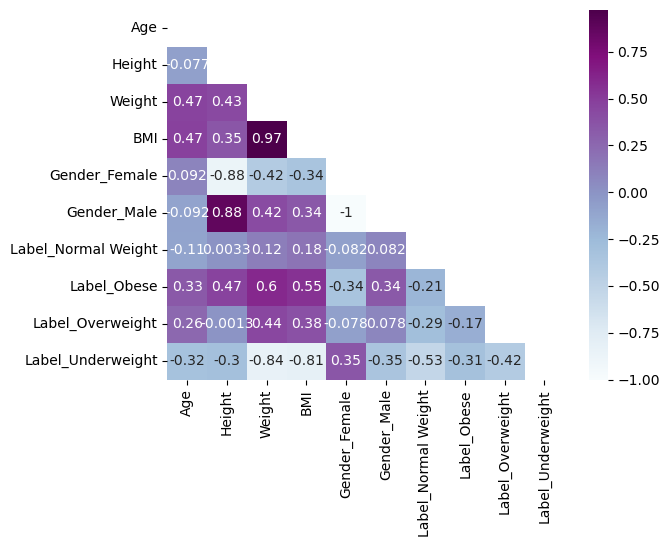

In [71]:
corr=df2.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Convert categorical variable into integers 
df3=df.copy()
df3['Gender'] = le.fit_transform(df3['Gender'])

In [73]:
df3.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight


In [74]:
# Age binning
df4=df.copy()
df4['Age'].min(),df4['Age'].max()

(11, 112)

In [75]:
bins=[0,20,40,60,80,100,200]
df4['Age_bins']=pd.cut(df4['Age'],bins)
df4.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label,Age_bins
0,1,25,Male,175,80,25.3,Normal Weight,"(20, 40]"
1,2,30,Female,160,60,22.5,Normal Weight,"(20, 40]"
2,3,35,Male,180,90,27.3,Overweight,"(20, 40]"


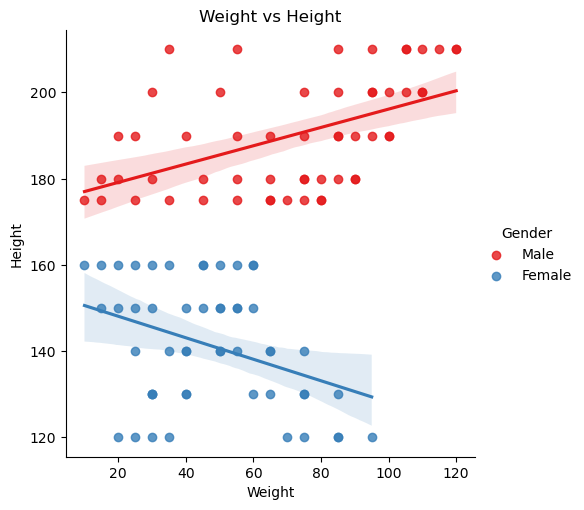

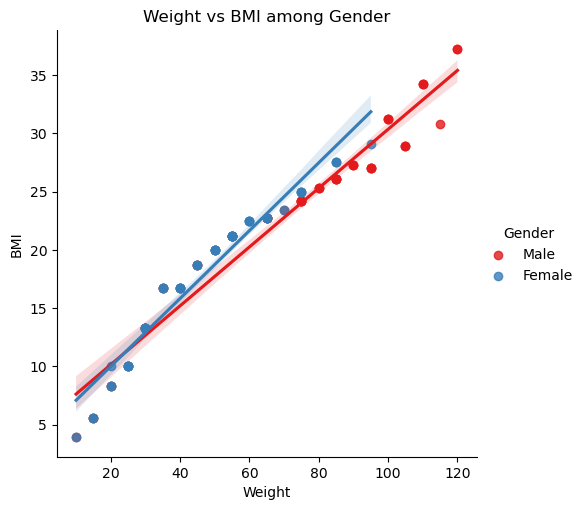

In [76]:
sns.lmplot(x='Weight',y='Height',hue='Gender',data=df4,palette='Set1')
plt.title('Weight vs Height')
plt.show()

sns.lmplot(x='Weight',y='BMI',hue='Gender',data=df4,palette='Set1')
plt.title('Weight vs BMI among Gender')
plt.show()


## Classification using K-means clustering

In [81]:
df.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight


In [82]:
df5=df.copy()
df5['Gender'] = le.fit_transform(df5['Gender'])
df5['Label'] = le.fit_transform(df5['Label'])

In [83]:
X=df5.drop('ID',axis=1)
y=df5['Label']

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

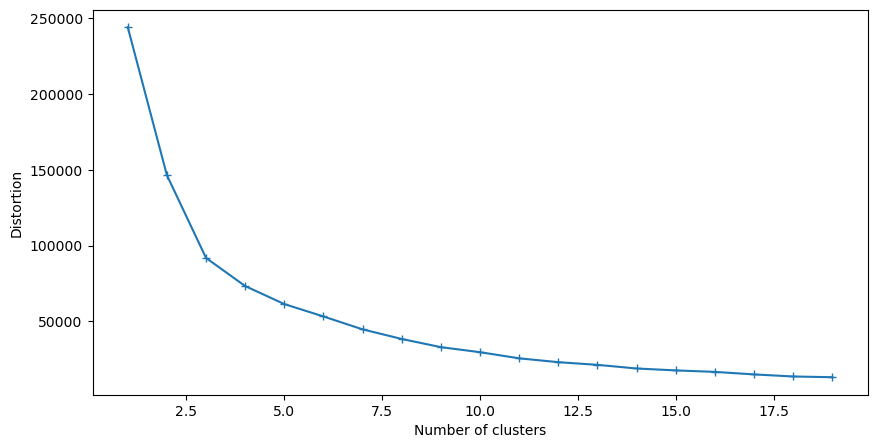

In [84]:
dist_list=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='random',random_state=101)
  kmeans.fit(X)
  dist_list.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [87]:
kmeans4=KMeans(n_clusters=4,random_state=101)

kmeans4.fit(X)

labels=kmeans4.labels_

correct_labels=sum(y==labels)
print('n_clusters=4: %d out of %d samples were correctly labeled.' % (correct_labels,y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size)))

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



n_clusters=4: 56 out of 108 samples were correctly labeled.
Accuracy score: 0.52


In [88]:
labels=pd.Series(kmeans4.labels_,name='cluster_number')

In [89]:
df_with_cluster=pd.concat([df,labels],axis=1)
df_with_cluster.head(3)

,ID,Age,Gender,Height,Weight,BMI,Label,cluster_number
0,1,25,Male,175,80,25.3,Normal Weight,2
1,2,30,Female,160,60,22.5,Normal Weight,2
2,3,35,Male,180,90,27.3,Overweight,2


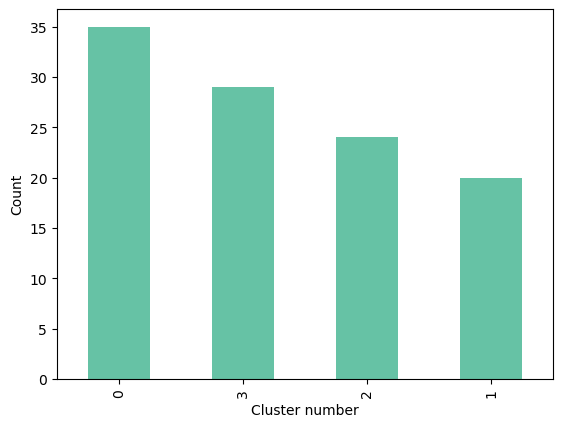

In [90]:
df_with_cluster['cluster_number'].value_counts().plot(kind='bar',cmap='Set2')
plt.xlabel('Cluster number')
plt.ylabel('Count')
plt.show()

In [92]:
# Age binning
bins=[0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,112]
df_with_cluster['Age_bins']=pd.cut(df_with_cluster['Age'],bins)

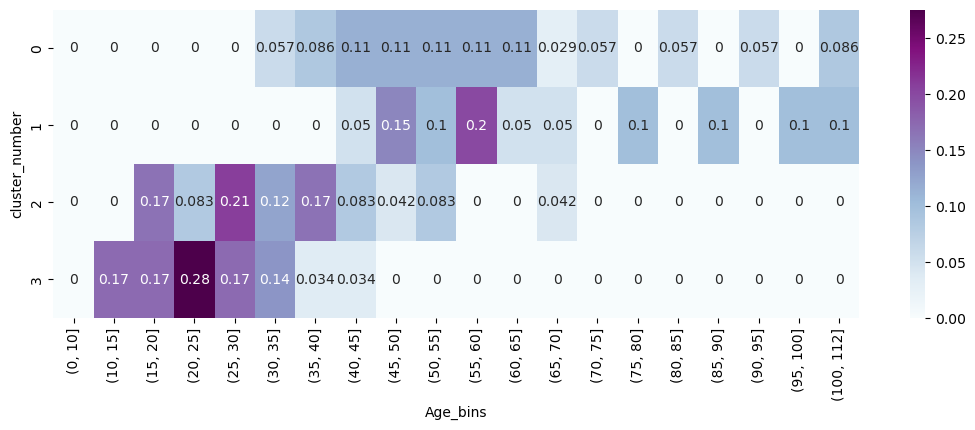

In [93]:
df_cluster_age=df_with_cluster.groupby(['cluster_number','Age_bins']).size().unstack().fillna(0)
sns.heatmap(df_cluster_age.apply(lambda x:x/x.sum(),axis=1),annot=True,cmap='BuPu')
plt.gcf().set_size_inches(13,4)
plt.show()